In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df_salary = pd.read_csv("salary-data.csv")
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df_salary.shape

(30, 2)

In [4]:
df_salary.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

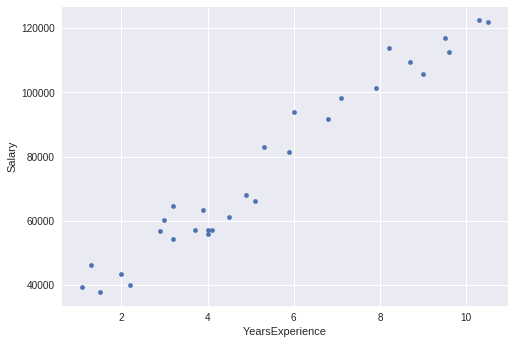

In [5]:
df_salary.plot.scatter(x='YearsExperience',
                    y='Salary')
plt.show()

### split data

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

In [7]:
train_data, test_data = train_test_split(df_salary, test_size=0.2, random_state=333)
print("Total Training:",train_data.shape[0])
print("Total Testing:",test_data.shape[0])

Total Training: 24
Total Testing: 6


In [8]:
train_label = train_data['Salary']
train_feature = train_data.drop(['Salary'], axis=1)

In [9]:
test_label = test_data['Salary']
test_feature = test_data.drop(['Salary'], axis=1)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_model = LinearRegression()
lr_model.fit(X=train_feature,
             y=train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# R-squared
accuracy_score = lr_model.score(X=test_feature, y=test_label)

In [13]:
accuracy_score

0.9421901163257494

In [14]:
final_result = test_data.copy()
final_result['PredictedSalary'] = lr_model.predict(X=test_feature)
final_result

,YearsExperience,Salary,PredictedSalary
21,7.1,98273.0,92312.284566
0,1.1,39343.0,35796.740414
6,3.0,60150.0,53693.329396
2,1.5,37731.0,39564.443357
4,2.2,39891.0,46157.923509
17,5.3,83088.0,75357.621321


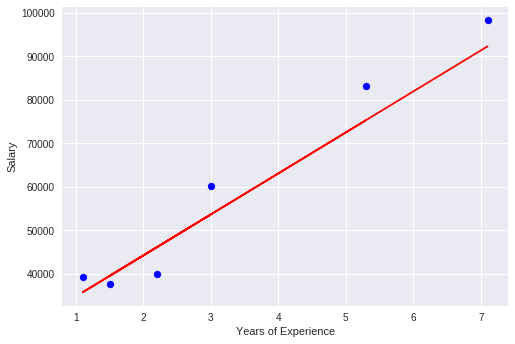

In [15]:
plt.scatter(final_result['YearsExperience'], final_result['Salary'], color='blue')
plt.plot(final_result['YearsExperience'], final_result['PredictedSalary'], color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [16]:
print(f"Coefficient: {lr_model.coef_[0]}")
print(f"Intercept: {lr_model.intercept_}")

Coefficient: 9419.25735874591
Intercept: 25435.55731927372
